Hi,

This is a demonstration of how powerfull deep neural networks are!

We're going to generate the spiral database and then try to model this data with softmax and then with a neural network and see how it goes.

We're going to follow this tutorial: http://cs231n.github.io/neural-networks-case-study/
If you want more details check it! But here we're going to use TensorFlow!

Have fun!

## Generating the data

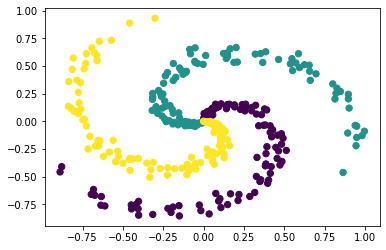

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# In this section: Exact same code from the tutorial

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes

X = np.zeros((N * K, D)) # data matrix (each row = single example)
y = np.zeros(N * K, dtype='uint8') # class labels

for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = np.linspace(0.0, 1, N) # radius
    t = np.linspace(j * 4,(j + 1) * 4, N) + np.random.randn(N) * 0.2 # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j


# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40)

# Generating a Y with the shape: [None, [0.0, 0.0, 1.0]]
y_ = np.zeros((N * K, K), dtype='uint8')
for i in range(N * K):
    for j in range(K):
        if j == y[i]:
            y_[i][j] = 1.0

plt.show()

"The toy spiral data consists of three classes (blue, red, yellow) that are not linearly separable."

## Training a Softmax Linear Classifier

In [5]:
# placeholders
input_pl = tf.placeholder(tf.float32, [N * K, D])
labels_pl = tf.placeholder(tf.int32, [N * K, K])

# initialize parameters randomly
W = tf.Variable(tf.truncated_normal([D, K], stddev=0.01), tf.float32)
b = tf.Variable(tf.zeros([1, K]), tf.float32)

# compute class scores for a linear classifier
scores = tf.matmul(input_pl, W) + b
pred = tf.nn.softmax(scores)

# loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels_pl,
                                                              logits=scores))

# gradient descent
gd = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

# accuracy
correct_prediction = tf.equal(tf.argmax(labels_pl, 1), tf.argmax(pred,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init = tf.global_variables_initializer()


AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [3]:
## Train
w_res = 0
b_res = 0

with tf.Session() as sess:
    
    sess.run(init)
    
    for i in xrange(5000):
        
        _, l, acc = sess.run([gd, loss, accuracy], feed_dict={input_pl: X, labels_pl: y_})
        if i % 100 == 0:
            print 'step: ', i, ', loss: ', l, ', accuracy: ', acc
    
    print 'Done!'
    print 'accuracy:', accuracy.eval({input_pl: X, labels_pl: y_})
    
    
    # saving vars
    w_res = W.eval();
    b_res = b.eval();
    

step:  0 , loss:  1.09933 , accuracy:  0.31
step:  100 , loss:  0.781919 , accuracy:  0.506667
step:  200 , loss:  0.765471 , accuracy:  0.503333
step:  300 , loss:  0.762648 , accuracy:  0.506667
step:  400 , loss:  0.76199 , accuracy:  0.503333
step:  500 , loss:  0.761817 , accuracy:  0.51
step:  600 , loss:  0.761769 , accuracy:  0.51
step:  700 , loss:  0.761755 , accuracy:  0.51
step:  800 , loss:  0.761751 , accuracy:  0.51
step:  900 , loss:  0.761749 , accuracy:  0.51
step:  1000 , loss:  0.761749 , accuracy:  0.51
step:  1100 , loss:  0.761749 , accuracy:  0.51
step:  1200 , loss:  0.761749 , accuracy:  0.51
step:  1300 , loss:  0.761749 , accuracy:  0.51
step:  1400 , loss:  0.761749 , accuracy:  0.51
step:  1500 , loss:  0.761749 , accuracy:  0.51
step:  1600 , loss:  0.761749 , accuracy:  0.51
step:  1700 , loss:  0.761749 , accuracy:  0.51
step:  1800 , loss:  0.761749 , accuracy:  0.51
step:  1900 , loss:  0.761749 , accuracy:  0.51
step:  2000 , loss:  0.761749 , accura

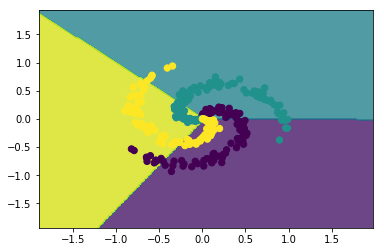

In [4]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w_res) + b_res
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
plt.show()

Okay... that was disappointing, a random prediction can get a very close accuracy :/.
Let's see..

## Random approach

In [5]:
# generating a random prediction
r = []
for i in xrange(N * K):
    a = [0.0, 0.0, 0.0]
    a[np.random.randint(3, size=1)[0]] = 1.0
    r.append(a)    
random_pred = tf.constant(r)

# random accuracy
random_correct_prediction = tf.equal(tf.argmax(labels_pl, 1), tf.argmax(random_pred,1))
random_accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    
    # print sess.run(random_pred)
    sess.run(init)
    print 'Done!'
    print 'accuracy:', random_accuracy.eval({input_pl: X, labels_pl: y_})

Done!
accuracy: 0.323333


"Clearly, a linear classifier is inadequate for this dataset and we would like to use a Neural Network. One additional hidden layer will suffice for this toy data. We will now need two sets of weights and biases (for the first and second layers):"

## Neural networks show us your power!

In [8]:
h = 100 # size of hidden layer

In [9]:
# placeholders
input_pl2 = tf.placeholder(tf.float32, [N * K, D])
labels_pl2 = tf.placeholder(tf.int32, [N * K, K])

# initialize parameters randomly
# first layer
W1 = tf.Variable(tf.truncated_normal([D, h], stddev=0.01), tf.float32)
b1 = tf.Variable(tf.zeros([1, h]), tf.float32)

# evaluate class scores with a 2-layer Neural Network
hidden_layer = tf.nn.relu(tf.matmul(input_pl2, W1) + b1) # note, ReLU activation

# second layer (and last, wow that is a small network)
W2 = tf.Variable(tf.truncated_normal([h, K], stddev=0.01), tf.float32)
b2 = tf.Variable(tf.zeros([1, K]), tf.float32)
scores = tf.matmul(hidden_layer, W2) + b2
pred = tf.nn.softmax(scores)

# loss
loss2 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels_pl2,
                                                               logits=scores))
# gradient descent
gd2 = tf.train.GradientDescentOptimizer(0.5).minimize(loss2)

# accuracy
correct_prediction = tf.equal(tf.argmax(labels_pl2, 1), tf.argmax(pred,1))
accuracy2 = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init2 = tf.global_variables_initializer()

In [10]:
## Train
w1_res = 0
b1_res = 0
w2_res = 0
b2_res = 0

with tf.Session() as sess:
    
    sess.run(init2)
    
    for i in xrange(5000):
        
        _, l, acc = sess.run([gd2, loss2, accuracy2], feed_dict={input_pl2: X, labels_pl2: y_})
        if i % 100 == 0:
            print 'step: ', i, ', loss: ', l, ', accuracy: ', acc
    
    print 'Done!'
    print 'accuracy:', accuracy2.eval({input_pl2: X, labels_pl2: y_})
    
    w1_res, b1_res, w2_res, b2_res = W1.eval(), b1.eval(), W2.eval(), b2.eval()

step:  0 , loss:  1.09856 , accuracy:  0.443333
step:  100 , loss:  0.750885 , accuracy:  0.533333
step:  200 , loss:  0.699071 , accuracy:  0.543333
step:  300 , loss:  0.65848 , accuracy:  0.606667
step:  400 , loss:  0.595756 , accuracy:  0.683333
step:  500 , loss:  0.590207 , accuracy:  0.733333
step:  600 , loss:  0.487347 , accuracy:  0.78
step:  700 , loss:  0.390343 , accuracy:  0.833333
step:  800 , loss:  0.317024 , accuracy:  0.86
step:  900 , loss:  0.267774 , accuracy:  0.893333
step:  1000 , loss:  0.232986 , accuracy:  0.906667
step:  1100 , loss:  0.207324 , accuracy:  0.913333
step:  1200 , loss:  0.185526 , accuracy:  0.926667
step:  1300 , loss:  0.168282 , accuracy:  0.933333
step:  1400 , loss:  0.15233 , accuracy:  0.94
step:  1500 , loss:  0.14039 , accuracy:  0.94
step:  1600 , loss:  0.128637 , accuracy:  0.95
step:  1700 , loss:  0.119176 , accuracy:  0.956667
step:  1800 , loss:  0.111407 , accuracy:  0.966667
step:  1900 , loss:  0.1046 , accuracy:  0.96666

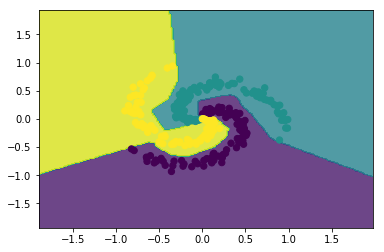

In [12]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], w1_res) + b1_res), w2_res) + b2_res
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
plt.show()

Now we're talking!